In [85]:
import matplotlib.pyplot as plt
from numpy import linspace
from sklearn.metrics import mean_squared_error
from sympy import Symbol, Integral, Derivative, init_printing, symbols, solve, diff

In [86]:
init_printing()

In [87]:
J,k,x,u = symbols("J,k,x,u")

In [88]:
def get_u(fi,n,const):
    #Сумма координатных функция без fo
    y = 0
    for i in range(n):
        y += const[i]*fi.subs(k,i+1)
    return y

In [89]:
def ritz(a,b,n,f,fi,fi0):
    u = Symbol("u")
    const = [Symbol("C"+str(i)) for i in range(1,n+1)]
    u_ = get_u(fi,n,const)
    #Прибавить к полученной функции fi0
    u_+=fi0
    f = f.subs({u:u_})
    J = Integral(f,(x,a,b))
    F = J.doit()
    #Частные производные F по Ci
    derr = [diff(F,c) for c in const]
    #Вычислить С
    sol = solve(derr,const)
    #Подставить С в u
    u = u_.subs(sol)
    return u

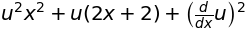

In [90]:
#Подинтегральная функция
f = Derivative(u,x)**2 + (x**2)*(u**2) + (2*x+2)*u
f

In [91]:
a = -1
b = 1

u_a = 0
u_b = 2

#Координатная функция
fi = x**(k-1)*(x-a)*(x-b)
fi

In [92]:
fi0 = ((u_b - u_a)/(b-a))*(x-a)+u_a
fi0

In [93]:
u2 = ritz(a,b,2,f,fi,fi0)
u3 = ritz(a,b,3,f,fi,fi0)

In [94]:
x_ = linspace(a,b,10)

In [95]:
y_2 = [u2.subs(x,v).evalf() for v in x_]
y_3 = [u3.subs(x,v).evalf() for v in x_]

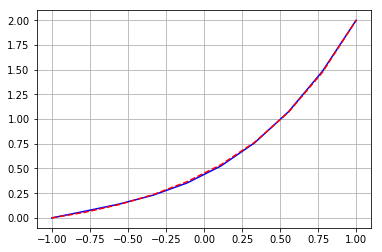

In [96]:
plt.plot(x_,y_2, 'b')
plt.plot(x_,y_3, 'r--')
plt.grid(True)
plt.show()

In [97]:
print("Cреднеквадратическое отклонение {}".format(mean_squared_error(y_3,y_2)))

Cреднеквадратическое отклонение 6.593398772696908e-05
